a1=  1.287357358541719
a0=  9.90860654749229
[0.10960367 5.48615518]


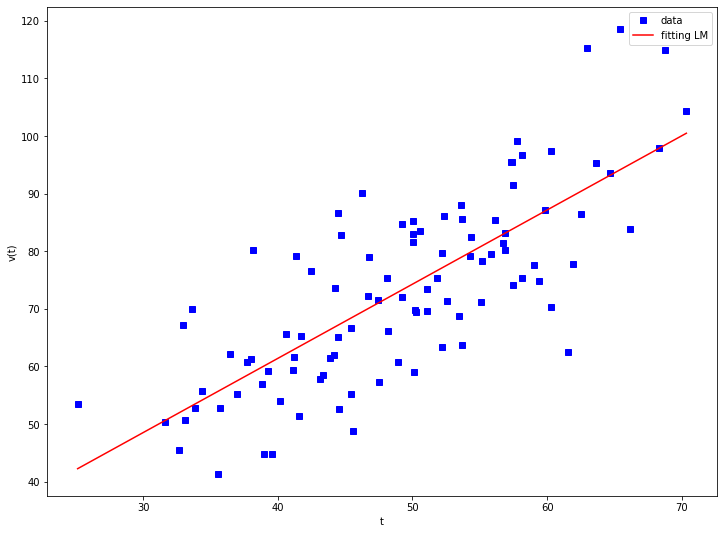

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv("https://raw.githubusercontent.com/mhemmg/NeuralNetworkRSouzaCourse/master/Notebooks/extras/classes_MH/class_7/data.csv")
X = data.iloc[:, 0]
y = data.iloc[:, 1]

X=X.to_numpy()
y=y.to_numpy()

def func(x, a1, a0):
    return a1 * x + a0

p0=np.array([10.0,10.0])
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, X, y, p0, method='lm')
perr = np.sqrt(np.diag(pcov))
print('a1= ',popt[0])
print('a0= ',popt[1])
print(perr)

t_mesh=np.linspace(np.min(X),np.max(X),100)
v_fit=popt[0]*t_mesh + popt[1]

fig,ax=plt.subplots(1,1)
ax.plot(X,y,'sb', label='data')
ax.plot(t_mesh,v_fit,'-r', label='fitting LM')

ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

In [96]:
# Definiendo las funciones de costo MSE,MAE, Y MAPE
def  MSE(theta,X,y):
   
   
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost
def  MAE(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/m) * np.sum(np.abs(predictions-y))
    return cost    
def  MAPE(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    
    cost = np.mean(np.abs((predictions-y)/y))*100
    return cost


In [97]:
theta= np.array([9.8,1.14]).reshape(2,1)
MSE(theta,X_b,y)

210635657.81649667

In [98]:

#Intanciando el descenso del gradiente 
def gradient_descent(f,X,y,theta,learning_rate=0.01,iterations=100):
    n = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/n)*learning_rate*( X.T.dot((prediction - y)))
        
        cost_history[it]  = f(theta,X,y)
        
    return theta,cost_history
        


In [99]:
# Valores para evaluar gradient descent
n_iter= 100
lr= 0.0001


theta = np.array([10,10]).reshape(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = gradient_descent(MSE,X_b,y,theta,lr,n_iter)
theta1,cost_history1 = gradient_descent(MAE,X_b,y,theta,lr,n_iter)
theta2,cost_history2 = gradient_descent(MAPE,X_b,y,theta,lr,n_iter)


print('Intercepción:          {:0.3f},\nPendiente:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Función de costo:  {:0.3f}'.format(cost_history[-1]))




Intercepción:          9.848,
Pendiente:          1.155
Función de costo:  76196319.876


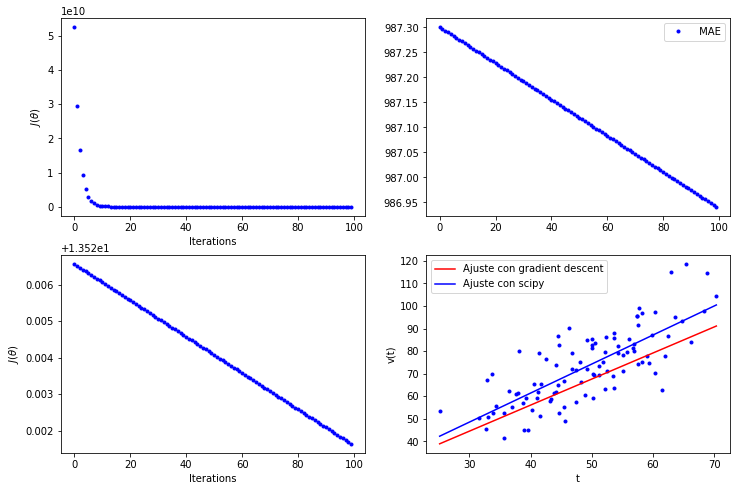

In [105]:
# plot de los resultados obtenidos 

fig,ax = plt.subplots(2,2,figsize=(12,8))

ax[0][0].plot(range(n_iter),cost_history,'b.',label= " MSE")
ax[0][1].plot(range(n_iter),cost_history1,'b.',label=" MAE")
ax[1][0].plot(range(n_iter),cost_history2,'b.',label=" MAPE")

# Plot de la regresión lineal con gradient descent y scipy 
X_mesh=np.linspace(np.min(X),np.max(X),100)
y_fit=theta[1][0]*X_mesh + theta[0][0]
scipy_fit=popt[0]*X_mesh + popt[1]
ax[1][1].plot(X,y,'b.')
ax[1][1].set_xlabel('t')
ax[1][1].set_ylabel('v(t)')

ax[1][1].plot(X_mesh,y_fit,'-r', label='Ajuste con gradient descent')
ax[1][1].plot(X_mesh,scipy_fit,'-b', label='Ajuste con scipy')
for i in range(0,2):
  for j in range(0,1):
    ax[i][j+1].legend()
    ax[i][j].set_xlabel('Iterations')
    ax[i][j].set_ylabel(r'$J(\theta)$')
    





### Si el learning rate es grande, es decir 0.1(esto depende de los datos), entonces la función de costo no converge a un valor mínimo, y por el contrario se obtienen valores grandes. 
### Con lr= 0.007 no hay mayor cambio 

In [101]:
popt[1]
#theta[0][0]


9.90860654749229